# Importing and Loading the Data


In [3]:
import pandas as pd

# Load the datasets
data_ott = pd.read_csv("data_ott.csv")
data_job_posting = pd.read_csv("data_job_posting.csv")

# Info and Data of Data OTT

In [4]:
data_ott_info = data_ott.info()
data_ott_head = data_ott.head()

data_ott_info, data_ott_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  S

# Info and Data of Data Job Posting

In [5]:
data_job_posting_info = data_job_posting.info()
data_job_posting_head = data_job_posting.head()
data_job_posting_info, data_job_posting_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

(None,
    job_id                                      title            location  \
 0       1                           Marketing Intern    US, NY, New York   
 1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
 2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
 3       4          Account Executive - Washington DC  US, DC, Washington   
 4       5                        Bill Review Manager  US, FL, Fort Worth   
 
   department salary_range                                    company_profile  \
 0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
 1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
 2        NaN          NaN  Valor Services provides Workforce Solutions th...   
 3      Sales          NaN  Our passion for improving quality of life thro...   
 4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   
 
                                         

# Percentage of Missing Values in Both Datasets

In [6]:
# Checking the percentage of missing values in both datasets to determine the severity of missingness

missing_ott = data_ott.isnull().mean() * 100
missing_job_posting = data_job_posting.isnull().mean() * 100

missing_ott, missing_job_posting

(show_id          0.000000
 type             0.000000
 title            0.000000
 director        29.908028
 cast             9.367549
 country          9.435676
 date_added       0.113546
 release_year     0.000000
 rating           0.045418
 duration         0.034064
 listed_in        0.000000
 description      0.000000
 dtype: float64,
 job_id                  0.000000
 title                   0.000000
 location                1.935123
 department             64.580537
 salary_range           83.959732
 company_profile        18.501119
 description             0.005593
 requirements           15.078300
 benefits               40.335570
 telecommuting           0.000000
 has_company_logo        0.000000
 has_questions           0.000000
 employment_type        19.412752
 required_experience    39.429530
 required_education     45.329978
 industry               27.421700
 function               36.101790
 fraudulent              0.000000
 dtype: float64)

# Handling Missing Values of Data ott

In [7]:
# For OTT dataset:
# - director, cast, and country: these can be imputed with 'Unknown' since they are categorical variables and it is acceptable to have unknown values for this type of data.
# - date_added: Convert to datetime and impute any missing with the most common value (mode).
# - rating: Impute missing with mode (most frequent).
# - duration: Impute missing with mode.


# Impute missing values in the OTT dataset
data_ott['director'].fillna('Unknown', inplace=True)
data_ott['cast'].fillna('Unknown', inplace=True)
data_ott['country'].fillna('Unknown', inplace=True)
data_ott['date_added'] = pd.to_datetime(data_ott['date_added'], errors='coerce')  # Convert date_added to datetime
data_ott['date_added'].fillna(data_ott['date_added'].mode()[0], inplace=True)
data_ott['rating'].fillna(data_ott['rating'].mode()[0], inplace=True)
data_ott['duration'].fillna(data_ott['duration'].mode()[0], inplace=True)


# Confirm missing values are handled
missing_ott_after = data_ott.isnull().sum()


missing_ott_after


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Handling Missing Values in Data Job Posting

In [8]:

# For job posting dataset:
# - department, salary_range, benefits, required_experience, required_education, industry, function:=
# --- Consider imputing with 'Unknown' or 'Not provided' if categorical or dropping if too many missing values.
# - company_profile: Impute missing with 'Unknown'.
# - employment_type, requirements: Impute with 'Unknown'.
# - location: Impute with mode as it is a critical feature for job postings.


# Impute missing values in the Job Posting dataset
data_job_posting['department'].fillna('Unknown', inplace=True)
data_job_posting['salary_range'].fillna('Not provided', inplace=True)
data_job_posting['company_profile'].fillna('Unknown', inplace=True)
data_job_posting['requirements'].fillna('Unknown', inplace=True)
data_job_posting['benefits'].fillna('Not provided', inplace=True)
data_job_posting['employment_type'].fillna('Unknown', inplace=True)
data_job_posting['required_experience'].fillna('Not provided', inplace=True)
data_job_posting['required_education'].fillna('Not provided', inplace=True)
data_job_posting['industry'].fillna('Unknown', inplace=True)
data_job_posting['function'].fillna('Unknown', inplace=True)
data_job_posting['location'].fillna(data_job_posting['location'].mode()[0], inplace=True)

# Confirm missing values are handled
missing_job_posting_after = data_job_posting.isnull().sum()

missing_job_posting_after

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            1
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Univariate EDA for OTT dataset

<ipython-input-9-4a6651c855e2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_ott, x='type', palette='Set2')


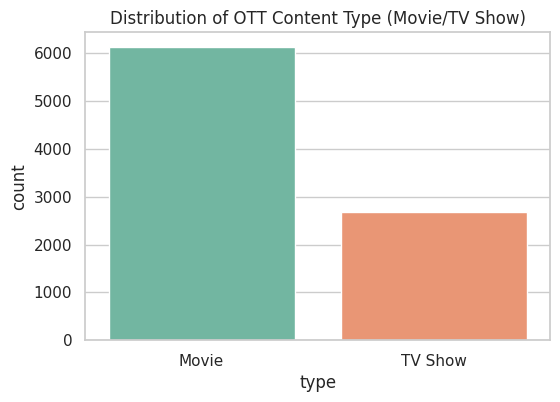

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# 1. Distribution of `type` (Movie/TV Show)
plt.figure(figsize=(6,4))
sns.countplot(data=data_ott, x='type', palette='Set2')
plt.title('Distribution of OTT Content Type (Movie/TV Show)')
plt.show()


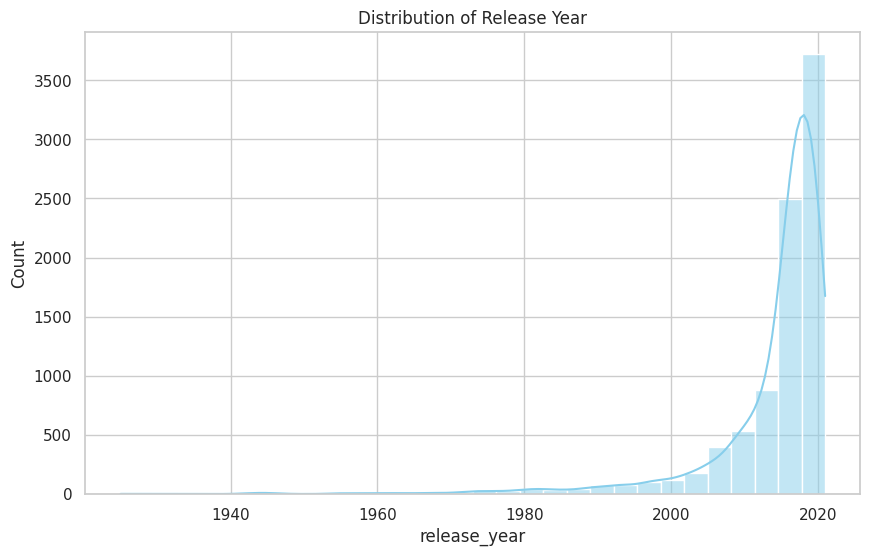

In [10]:
# 2. Distribution of `release_year`
plt.figure(figsize=(10,6))
sns.histplot(data=data_ott, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Year')
plt.show()

<ipython-input-11-afaab655709a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')


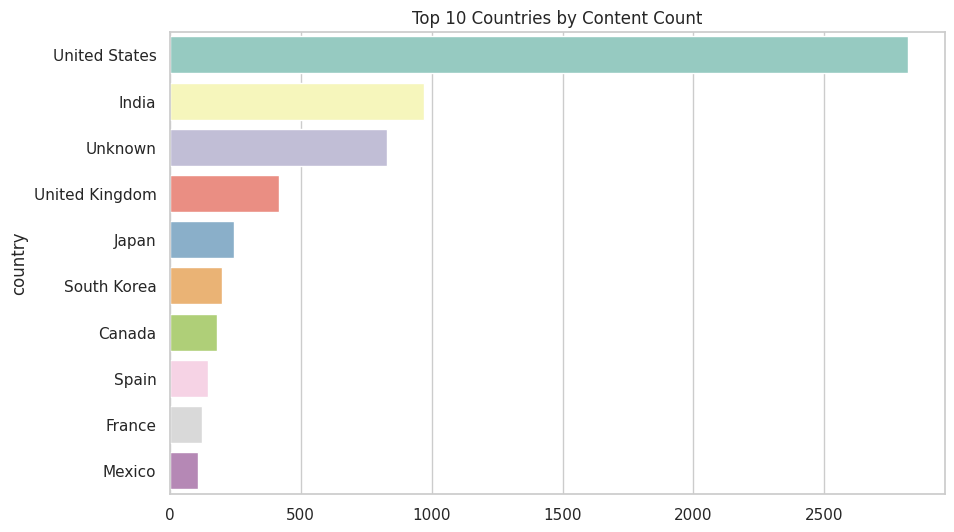

In [11]:
# 3. Top 10 countries with most content
plt.figure(figsize=(10,6))
top_countries = data_ott['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')
plt.title('Top 10 Countries by Content Count')
plt.show()

<ipython-input-12-48747e4e5167>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_ott, y='rating', order=data_ott['rating'].value_counts().index, palette='coolwarm')


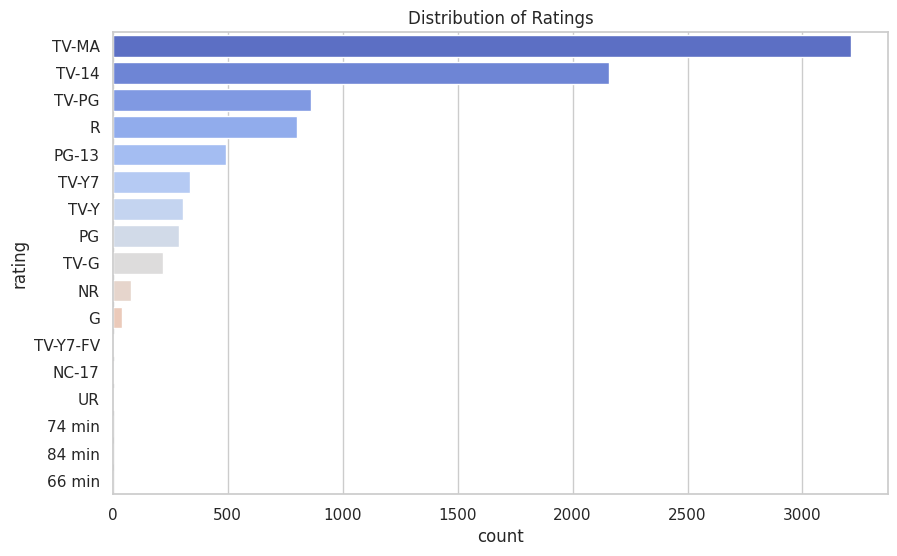

In [12]:
# 4. Rating distribution
plt.figure(figsize=(10,6))
sns.countplot(data=data_ott, y='rating', order=data_ott['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.show()

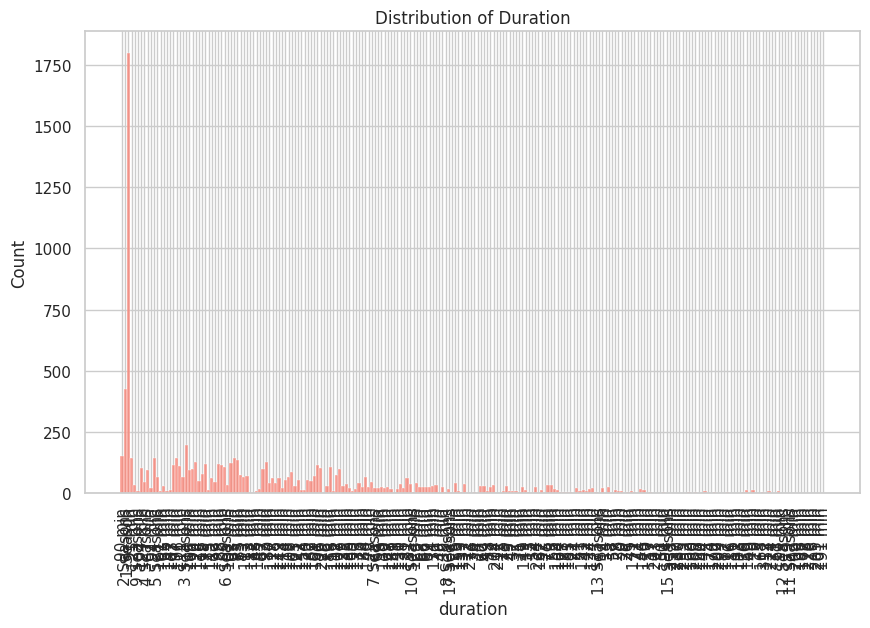

In [13]:
# 5. Duration distribution
plt.figure(figsize=(10,6))
sns.histplot(data=data_ott, x='duration', kde=False, color='salmon')
plt.xticks(rotation=90)
plt.title('Distribution of Duration')
plt.show()

# Univariate EDA on Job Data Posting

<ipython-input-14-0915d4373cf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_job_posting, x='fraudulent', palette='Set1')


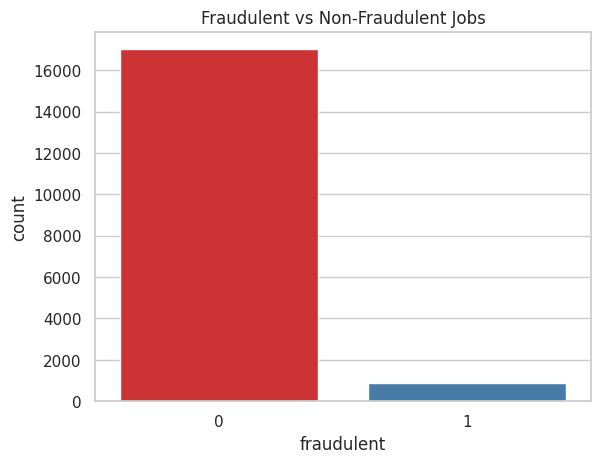

In [14]:
# Fraudulent Job Posts: Count of real vs. fraudulent jobs.
sns.countplot(data=data_job_posting, x='fraudulent', palette='Set1')
plt.title('Fraudulent vs Non-Fraudulent Jobs')
plt.show()


<ipython-input-15-67a3ec53c51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_job_posting, x='telecommuting', palette='Set2')


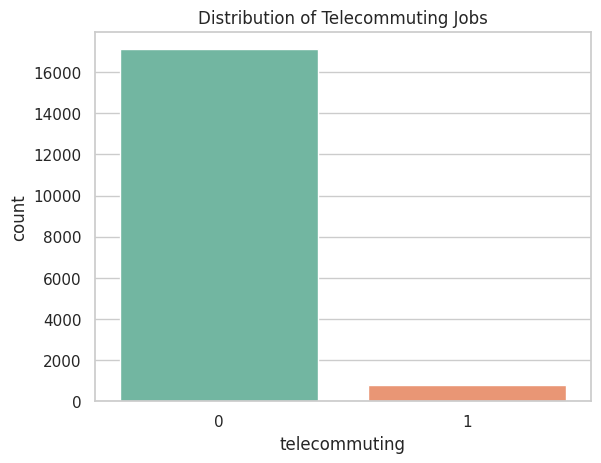

In [15]:
# Telecommuting Jobs: Distribution of jobs allowing remote work.
sns.countplot(data=data_job_posting, x='telecommuting', palette='Set2')
plt.title('Distribution of Telecommuting Jobs')
plt.show()


<ipython-input-16-a8d048a9d7c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_job_posting, x='salary_range', palette='Set3')


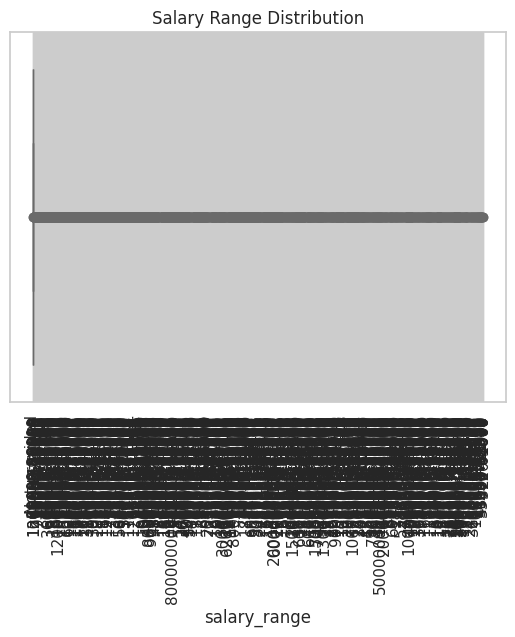

In [16]:
# Salary Range Distribution: A boxplot of the salary ranges, once they are parsed into a numerical format.
sns.boxplot(data=data_job_posting, x='salary_range', palette='Set3')
plt.xticks(rotation=90)
plt.title('Salary Range Distribution')
plt.show()


# Multivariate EDA

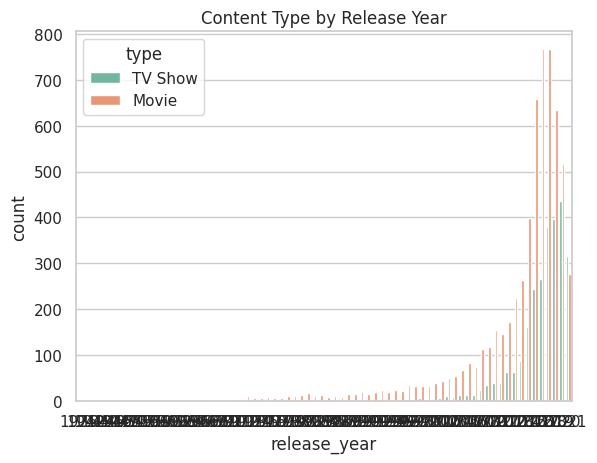

In [17]:
 # Content Type vs. Release Year (OTT Dataset):
sns.countplot(data=data_ott, x='release_year', hue='type', palette='Set2')
plt.title('Content Type by Release Year')
plt.show()


<ipython-input-18-1005c05e7d37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_job_posting, x='fraudulent', y='company_profile', palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 

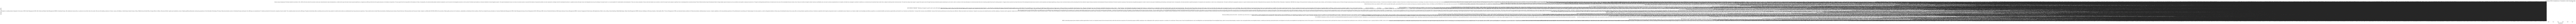

In [18]:
# Fraudulent Jobs vs. Company Profile Completeness (Job Posting Dataset)
sns.boxplot(data=data_job_posting, x='fraudulent', y='company_profile', palette='coolwarm')
plt.title('Company Profile Completeness in Fraudulent vs Non-Fraudulent Jobs')
plt.show()


# Summary

In [21]:
# A comprehensive summary of numerical data (e.g., release_year in the OTT dataset or fraudulent in the job posting dataset)
data_ott.describe()  # OTT dataset summary
data_job_posting.describe()  # Job Posting dataset summary


job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Correlations (Multivariate)

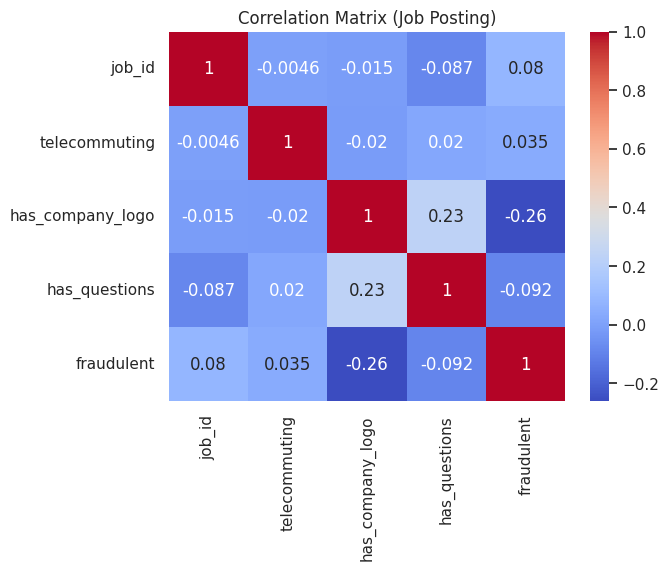

In [25]:
# Filter the dataset to include only numeric columns
numeric_cols = data_job_posting.select_dtypes(include='number')

# Now compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Job Posting)')
plt.show()


# Check for Duplicates

In [22]:
data_ott.duplicated().sum()  # Duplicates in OTT dataset
data_job_posting.duplicated().sum()  # Duplicates in Job Posting dataset


0

# Trend Analysis

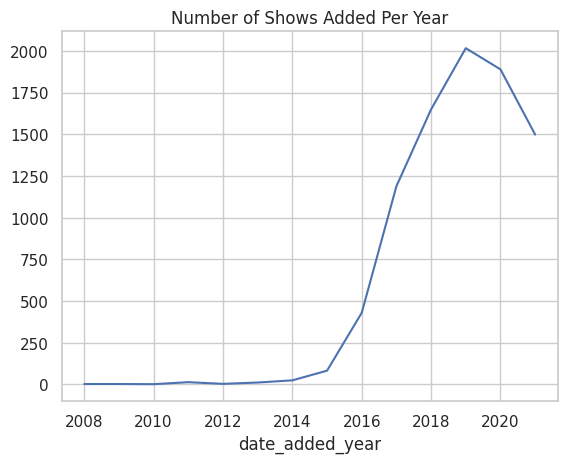

In [24]:
data_ott['date_added_year'] = pd.to_datetime(data_ott['date_added']).dt.year
trend_analysis = data_ott['date_added_year'].value_counts().sort_index()
sns.lineplot(x=trend_analysis.index, y=trend_analysis.values)
plt.title('Number of Shows Added Per Year')
plt.show()